## Introduction to Pandas - II

**First of all, import pandas and display:**

In [2]:
from IPython.display import display

# display has already been imported for you, try to import pandas yourself:

import pandas as pd

**Warmup Exercise**
> 1. Load the data from `PP-L2-shoefly.csv` (into the variable `orders` (Url: https://drive.google.com/u/1/uc?id=1TxuhuoNCG8y4nvnAPxtq7-N7NI7X4dG1&export=download)
2. Inspect the first 5 lines of the data.
3. Select all of the email addresses from the column email and save them to a variable called `emails`.
4. Frances Palmer claims that her order was wrong. What did Frances Palmer order?
5. Select all orders where `shoe_type` is in clogs, boots, and ballet flats (Hint: `df.isin()`)

In [3]:
# Type your code below
orders = pd.read_csv("https://drive.google.com/u/1/uc?id=1TxuhuoNCG8y4nvnAPxtq7-N7NI7X4dG1&export=download")

In [4]:
orders.head(5)

,id,first_name,last_name,gender,email,shoe_type,shoe_material,shoe_color
0,54791,Rebecca,Lindsay,female,RebeccaLindsay57@hotmail.com,clogs,faux-leather,black
1,53450,Emily,Joyce,female,EmilyJoyce25@gmail.com,ballet flats,faux-leather,navy
2,91987,Joyce,Waller,female,Joyce.Waller@gmail.com,sandles,fabric,black
3,14437,Justin,Erickson,male,Justin.Erickson@outlook.com,clogs,faux-leather,red
4,79357,Andrew,Banks,male,AB4318@gmail.com,boots,leather,brown


In [15]:
orders[["email"]]

,email
0,RebeccaLindsay57@hotmail.com
1,EmilyJoyce25@gmail.com
2,Joyce.Waller@gmail.com
3,Justin.Erickson@outlook.com
4,AB4318@gmail.com
5,JulieMarsh59@gmail.com
6,TJ5470@gmail.com
7,Janice.Hicks@gmail.com
8,GabrielPorter24@gmail.com
9,FrancesPalmer50@gmail.com


In [6]:
orders[(orders.first_name == 'Frances') & (orders.last_name == 'Palmer')]

,id,first_name,last_name,gender,email,shoe_type,shoe_material,shoe_color
9,62083,Frances,Palmer,female,FrancesPalmer50@gmail.com,wedges,leather,white


In [16]:
orders[orders.shoe_type.isin(['clogs','boots','ballet flats'])]

,id,first_name,last_name,gender,email,shoe_type,shoe_material,shoe_color
0,54791,Rebecca,Lindsay,female,RebeccaLindsay57@hotmail.com,clogs,faux-leather,black
1,53450,Emily,Joyce,female,EmilyJoyce25@gmail.com,ballet flats,faux-leather,navy
3,14437,Justin,Erickson,male,Justin.Erickson@outlook.com,clogs,faux-leather,red
4,79357,Andrew,Banks,male,AB4318@gmail.com,boots,leather,brown
6,20487,Thomas,Jensen,male,TJ5470@gmail.com,clogs,fabric,navy
7,76971,Janice,Hicks,female,Janice.Hicks@gmail.com,clogs,faux-leather,navy
8,21586,Gabriel,Porter,male,GabrielPorter24@gmail.com,clogs,leather,brown
10,91629,Jessica,Hale,female,JessicaHale25@gmail.com,clogs,leather,red
12,45832,Susan,Dennis,female,SusanDennis58@gmail.com,ballet flats,fabric,white
14,73431,Rebecca,Charles,female,Rebecca.Charles@gmail.com,boots,faux-leather,white


In [18]:
# Let's revisit our clinic data

df = pd.DataFrame([
        ['January', 100, 100, 23, 100],
        ['February', 51, 45, 145, 45],
        ['March', 81, 96, 65, 96],
        ['April', 80, 80, 54, 180],
        ['May', 51, 54, 54, 154],
        ['June', 112, 109, 79, 129]
    ],
    columns=[
        'month', 'clinic_east',
        'clinic_north', 'clinic_south',
        'clinic_west'
    ]
)
df

,month,clinic_east,clinic_north,clinic_south,clinic_west
0,January,100,100,23,100
1,February,51,45,145,45
2,March,81,96,65,96
3,April,80,80,54,180
4,May,51,54,54,154
5,June,112,109,79,129


### 1. Renaming columns

We can rename both column names and index (row name) with the rename function.  A dictionary is required as parameter.

```python
# To rename columns
df.rename(columns={})
df.rename({}, axis=1)


# To rename rows
df.rename(index={})
df.rename({}, axis=0)
```

In [19]:
# Example of renaming the clinic dataframe columns
df_copy = df.copy()

# Show renamed columns
display(
    df_copy.rename(
        columns={
            "month": "Month",
            "clinic_east": "Clinic East",
            "CLINIC_NORTH": "CLINIC NORTH" # Note that it is case-sensitive
        }
    )
)

# Note that the dataframe is not mutated.
# To apply the renamed column, either pass inplace=True to df.rename() or assign the output back to the variable
# display(df_copy)

,Month,Clinic East,clinic_north,clinic_south,clinic_west
0,January,100,100,23,100
1,February,51,45,145,45
2,March,81,96,65,96
3,April,80,80,54,180
4,May,51,54,54,154
5,June,112,109,79,129


### 2. Directly change column names

Column names can also be altered by directly replace the variable in `.columns` attribute of a dataframe.

This method mutates the dataframe

```python
df.columns = ['col1', 'col2']
```

In [ ]:
# Example of changing column names with df.columns
df_copy = df.copy()

df_copy.columns = ["Col1", "Col2", "Col3", "Col4", "Col5"]
display(df_copy)

,Col1,Col2,Col3,Col4,Col5
0,January,100,100,23,100
1,February,51,45,145,45
2,March,81,96,65,96
3,April,80,80,54,180
4,May,51,54,54,154
5,June,112,109,79,129


### 3. Adding a Column

Sometimes, we want to add a column to an existing DataFrame.

One way that we can add a new column is by giving a list of the same length as the existing DataFrame.

In [20]:
# Example of creating column "Quantity"
example = pd.DataFrame([
        [1, '3 inch screw', 0.5, 0.75],
        [2, '2 inch nail', 0.10, 0.25],
        [3, 'hammer', 3.00, 5.50],
        [4, 'screwdriver', 2.50, 3.00]
    ],
    columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

print("Before")
display(example)

example['Quantity'] = [100, 150, 50, 35]

print("After")
display(example)

Before


,Product ID,Description,Cost to Manufacture,Price
0,1,3 inch screw,0.5,0.75
1,2,2 inch nail,0.1,0.25
2,3,hammer,3.0,5.50
3,4,screwdriver,2.5,3.00


After


,Product ID,Description,Cost to Manufacture,Price,Quantity
0,1,3 inch screw,0.5,0.75,100
1,2,2 inch nail,0.1,0.25,150
2,3,hammer,3.0,5.50,50
3,4,screwdriver,2.5,3.00,35


**Exercise**

> Add a column to `df` called `Sold in Bulk?`. The final table should look like this:

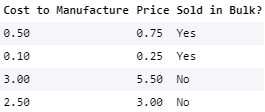

In [21]:
# Type your code here

df = pd.DataFrame([
        [1, '3 inch screw', 0.5, 0.75],
        [2, '2 inch nail', 0.10, 0.25],
        [3, 'hammer', 3.00, 5.50],
        [4, 'screwdriver', 2.50, 3.00]
    ],
    columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)
df["Sold in Bulk"]=["Yes","Yes","No","No"]
df

,Product ID,Description,Cost to Manufacture,Price,Sold in Bulk
0,1,3 inch screw,0.5,0.75,Yes
1,2,2 inch nail,0.1,0.25,Yes
2,3,hammer,3.0,5.50,No
3,4,screwdriver,2.5,3.00,No


In [23]:
df['Quantity'] = [100, 150, 50, 35]
df

,Product ID,Description,Cost to Manufacture,Price,Sold in Bulk,Quantity
0,1,3 inch screw,0.5,0.75,Yes,100
1,2,2 inch nail,0.1,0.25,Yes,150
2,3,hammer,3.0,5.50,No,50
3,4,screwdriver,2.5,3.00,No,35


In [26]:
df["Sold in Bulk"] = df.Price < 1.0
df

,Product ID,Description,Cost to Manufacture,Price,Sold in Bulk,Quantity,In Stock
0,1,3 inch screw,0.5,0.75,True,100,True
1,2,2 inch nail,0.1,0.25,True,150,True
2,3,hammer,3.0,5.50,False,50,True
3,4,screwdriver,2.5,3.00,False,35,True


In [27]:
df["In Stock"] = df.Quantity > 0
df

,Product ID,Description,Cost to Manufacture,Price,Sold in Bulk,Quantity,In Stock
0,1,3 inch screw,0.5,0.75,True,100,True
1,2,2 inch nail,0.1,0.25,True,150,True
2,3,hammer,3.0,5.50,False,50,True
3,4,screwdriver,2.5,3.00,False,35,True


We can also add a new column that is the same for all rows in the DataFrame:

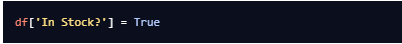

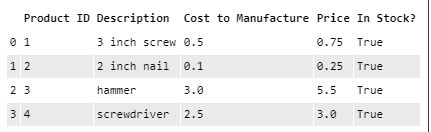

**Exercise**

- Add a column to `df` called `Is taxed?`, which indicates whether or not to collect sales tax on the product.

- It should be 'Yes' for all rows.

In [ ]:
# Type your code here

df = pd.DataFrame([
        [1, '3 inch screw', 0.5, 0.75],
        [2, '2 inch nail', 0.10, 0.25],
        [3, 'hammer', 3.00, 5.50],
        [4, 'screwdriver', 2.50, 3.00]
    ],
    columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

In [ ]:
df["Is taxed"] = True

In [ ]:
df

,Product ID,Description,Cost to Manufacture,Price,Is taxed
0,1,3 inch screw,0.5,0.75,True
1,2,2 inch nail,0.1,0.25,True
2,3,hammer,3.0,5.50,True
3,4,screwdriver,2.5,3.00,True


You can add a new column by performing a function on the existing columns.

In [ ]:
# Example of adding new column 'Sales Tax'

example['Sales Tax'] = example['Price'] * 0.75

display(example)

,Product ID,Description,Cost to Manufacture,Price,Quantity,Sales Tax
0,1,3 inch screw,0.5,0.75,100,0.5625
1,2,2 inch nail,0.1,0.25,150,0.1875
2,3,hammer,3.0,5.50,50,4.1250
3,4,screwdriver,2.5,3.00,35,2.2500


**Exercise**

Add a column to `df` called `Margin`, which is equal to the difference between the Price and the Cost to Manufacture.

In [ ]:
df = pd.DataFrame([
        [1, '3 inch screw', 0.5, 0.75],
        [2, '2 inch nail', 0.10, 0.25],
        [3, 'hammer', 3.00, 5.50],
        [4, 'screwdriver', 2.50, 3.00]
    ],
    columns=['Product ID', 'Description', 'Cost to Manufacture', 'Price']
)

# Type your code below




### 4. Index

Column names can also be altered by directly replace the variable in `.index` attribute of a dataframe.

```python
df.index = range(100, 106)
```

Every `dataframe` and `series` comes with an index.  Index is every useful to identify each row.  For example, index remain unchanged after we do a filtering.

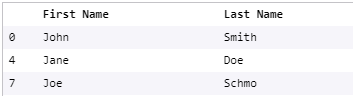

By default, when a dataframe or series is created. Indexes are consecutive numbers.

**.set_index()**
You can set the index of a dataframe or series with
1. Column name
2. Series

**Exercise**
    
1. Make the `month`  columns as index, and save the result into `df_month_index`

In [ ]:
df

,month,clinic_east,clinic_north,clinic_south,clinic_west
0,January,100,100,23,100
1,February,51,45,145,45
2,March,81,96,65,96
3,April,80,80,54,180
4,May,51,54,54,154
5,June,112,109,79,129


In [ ]:
# Type your code below
df_month_index = df.set_index("month")

KeyError: "None of ['month'] are in the columns"

**.reset_index()**

we get a new DataFrame with a new set of indices:

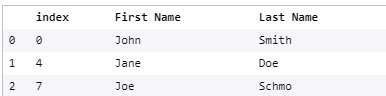

Note that the old indices have been moved into a new column called 'index'. it’s better to use the keyword `drop=True` so that you don’t end up with that extra column. If we run the command `df.reset_index(drop=True)`, we get a new DataFrame that looks like this:

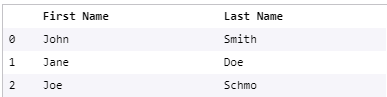

**Exercise**
1. Reset the index, so that the `month` column is restored

In [ ]:
df_month_index.reset_index()

,month,clinic_east,clinic_north,clinic_south,clinic_west
0,January,100,100,23,100
1,February,51,45,145,45
2,March,81,96,65,96
3,April,80,80,54,180
4,May,51,54,54,154
5,June,112,109,79,129


**NOTE: inplace**

Most of the pandas functions return a new object.  For example:

- `df.reset_index()` returns a new dataframe with new index.
- `df.rename()` returns a new dataframe with renamed columns

The benefit is that we are able to chain up functions like `df.rename().reset_index().groupby()......`

However if you wish to modify the original object, you can pass in the parameter `inplace=True`

### 5. Multi index

Pandas support multi index, which mean an index with multiple levels.  It can be achieved by setting index with a list of string or series.

```python
.set_index([strings_or_series])
```

Exercise:
1. With the help of a *for* loop,
- Create a dateframe called with columns `month`, `count`, `clinic` where `clinic` contains a constant `clinic_east`
- Create a dateframe called with columns `month`, `count`, `clinic` where `clinic` contains a constant `clinic_south`
- Create a dateframe called with columns `month`, `count`, `clinic` where `clinic` contains a constant `clinic_west`
- Create a dateframe called with columns `month`, `count`, `clinic` where `clinic` contains a constant `clinic_north`
2. Use `pd.concat()` to form a large dataframe
3. Make a multi index with `clinic`, `month`

In [ ]:
df[["month","clinic_east"]]

,month,clinic_east
0,January,100
1,February,51
2,March,81
3,April,80
4,May,51
5,June,112


In [ ]:
df_copy = df.copy()

In [ ]:
df1

,month,count
0,January,100
1,February,51
2,March,81
3,April,80
4,May,51
5,June,112


In [ ]:
df1 = df_copy[["month","clinic_east"]]
df1["clinic"] = "clinic_east"

C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_19428\684025942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clinic"] = "clinic_east"


In [ ]:
df2 = df_copy[["month","clinic_south"]]
df2["clinic"] = "clinic_south"

In [ ]:
df3 = df_copy[["month","clinic_west"]]
df3["clinic"] = "clinic_west"

In [ ]:
df4 = df_copy[["month","clinic_north"]]
df4["clinic"] = "clinic_north"

C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_16488\1905226360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clinic"] = "clinic_east"
C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_16488\1905226360.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["clinic"] = "clinic_south"
C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_16488\1905226360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
df1 = df_copy[["month","clinic_east"]]
df1.loc[:, 'clinic'] = 'clinic_east'

C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_19428\1536754781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'clinic'] = 'clinic_east'


In [ ]:
df2 = df_copy[["month","clinic_south"]]
df2.loc[:, 'clinic'] = 'clinic_south'

C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_19428\755925847.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'clinic'] = 'clinic_south'


In [ ]:
df3 = df_copy[["month","clinic_west"]]
df3.loc[:, 'clinic'] = 'clinic_west'

In [ ]:
df4 = df_copy[["month","clinic_north"]]
df4.loc[:, 'clinic'] = 'clinic_north'

In [ ]:
df1 = df1.rename(columns={
            "clinic_east": "count",
        })

In [ ]:
df2 = df2.rename(columns={
            "clinic_south": "count",
        })

In [ ]:
df3 = df3.rename(columns={
            "clinic_west": "count",
        })

In [ ]:
df4 = df4.rename(columns={
            "clinic_north": "count",
        })

In [ ]:
df_all = pd.concat([df1,df2,df3,df4])

In [ ]:
df_all

,month,count
0,January,100
1,February,51
2,March,81
3,April,80
4,May,51
5,June,112
0,January,23
1,February,145
2,March,65
3,April,54


In [ ]:
df_all.set_index(["month", "clinic"])

,,count
month,clinic,
January,clinic_east,100
February,clinic_east,51
March,clinic_east,81
April,clinic_east,80
May,clinic_east,51
June,clinic_east,112
January,clinic_south,23
February,clinic_south,145
March,clinic_south,65


In [ ]:
for clinic in ['clinic_east', 'clinic_south', 'clinic_west', 'clinic_north']:
	df_temp = df_copy[["month",clinic]]
	df_temp["clinic"] = clinic
	df_temp = df_temp.rename(columns={
	            clinic: "count",
	        })
	all_df.append(df_temp)
    pass

C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_16488\3281925626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["clinic"] = clinic
C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_16488\3281925626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["clinic"] = clinic
C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_16488\3281925626.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
import pandas as pd

In [ ]:
# Let's revisit our clinic data

df = pd.DataFrame([
        ['January', 100, 100, 23, 100],
        ['February', 51, 45, 145, 45],
        ['March', 81, 96, 65, 96],
        ['April', 80, 80, 54, 180],
        ['May', 51, 54, 54, 154],
        ['June', 112, 109, 79, 129]
    ],
    columns=[
        'month', 'clinic_east',
        'clinic_north', 'clinic_south',
        'clinic_west'
    ]
)


In [ ]:
all_df = []

for clinic in ['clinic_east', 'clinic_south', 'clinic_west', 'clinic_north']:
    df_new = df[["month", clinic]]
    df_new["clinic"] = clinic
    df_new.rename(columns = {clinic:"count"}, inplace = True)
    all_df.append(df_new)
    pass

df_all = df.concat(all_df)
df_all.set_index(["month", "clinic"])

C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_24436\1480128085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["clinic"] = clinic
C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_24436\1480128085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.rename(columns = {clinic:"count"}, inplace = True)
C:\Users\Derek.Cheung\AppData\Local\Temp\ipykernel_24436\1480128085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [ ]:
all_df

[      month  count       clinic
 0   January    100  clinic_east
 1  February     51  clinic_east
 2     March     81  clinic_east
 3     April     80  clinic_east
 4       May     51  clinic_east
 5      June    112  clinic_east,
       month  count        clinic
 0   January     23  clinic_south
 1  February    145  clinic_south
 2     March     65  clinic_south
 3     April     54  clinic_south
 4       May     54  clinic_south
 5      June     79  clinic_south,
       month  count       clinic
 0   January    100  clinic_west
 1  February     45  clinic_west
 2     March     96  clinic_west
 3     April    180  clinic_west
 4       May    154  clinic_west
 5      June    129  clinic_west,
       month  count        clinic
 0   January    100  clinic_north
 1  February     45  clinic_north
 2     March     96  clinic_north
 3     April     80  clinic_north
 4       May     54  clinic_north
 5      June    109  clinic_north]

In [ ]:
df_all = pd.concat(all_df)

In [ ]:
df_all

,month,count,clinic
0,January,100,clinic_east
1,February,51,clinic_east
2,March,81,clinic_east
3,April,80,clinic_east
4,May,51,clinic_east
5,June,112,clinic_east
0,January,23,clinic_south
1,February,145,clinic_south
2,March,65,clinic_south
3,April,54,clinic_south


In [ ]:
df_all.set_index(["month", "clinic"])

,,count
month,clinic,
January,clinic_east,100
February,clinic_east,51
March,clinic_east,81
April,clinic_east,80
May,clinic_east,51
June,clinic_east,112
January,clinic_south,23
February,clinic_south,145
March,clinic_south,65


### 6. Column Operations

We can apply a function to every value in a particular column. For example, this code overwrites the existing 'Name' columns by applying the function upper to every row in 'Name'.

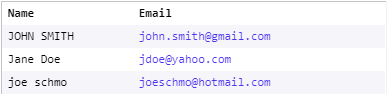

```python
df['Name'] = df.Name.str.upper()
```

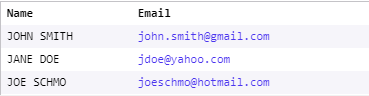

**Exercise**

> Apply the function `lower` to all names in column 'Name' in `df`. Assign these new names to a new column of `df` called 'Lowercase Name'

In [ ]:
employee_df = pd.read_csv("https://drive.google.com/u/1/uc?id=1d5MX8MBucLfrRkrxMyrXPMmcp4AzeNk7&export=download")

# Type your code below
employee_df['name'] = employee_df.name.str.lower()


In [ ]:
type(employee_df.name.str.lower())

pandas.core.series.Series

In [ ]:
employee_df['name']

0         lauren durham
1         grace sellers
2     shirley rasmussen
3           brian rojas
4       samantha mosley
5          louis guzman
6        denise mcclure
7         james raymond
8          noah collier
9       donna frederick
10         shirley beck
11      christina kelly
12          brian noble
13            randy key
14        diana stewart
15         timothy sosa
16        betty skinner
17        janet maxwell
18     madison johnston
19     virginia nichols
Name: name, dtype: object

###  ------ lambda ------

Lambda is a single-lined function.

The two functions below have the same functionality.

```python
# Version 1
def add_one(v):
    return v + 1

# Version 2
add_one = lambda v: v + 1
```

As observed, in python, function is an object and it can be stored in a variable.

# 🤯🤯🤯🤯🤯🤯

**Exercise**

> 1. Make a lambda that take one parameter and return 1 if the input is > 0 else return 0.
2. Call the lambda, just as you call a function

In [ ]:
# Type your code below

add_one = lambda v: 1 if v > 0 else 0

In [ ]:
add_one(0)

0

###  ------ lambda ------

### 7. .apply()

**series.apply()**

In Pandas, we often use lambda functions to perform complex operations on columns. For example, suppose that we want to create a column containing the email provider for each email address in the following table:

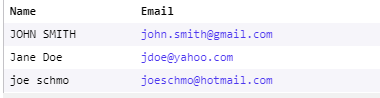

We could use the following code with a lambda function and the string method `.split()`:

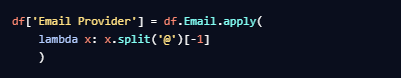

**Exercise**

> The DataFrame `employee_df` represents the hours worked by different employees over the course of the week.
> 1. Create a lambda function `get_last_name` which takes a string with someone’s name and returns just the last name
2. Use the lambda function `get_last_name` to create a new column `last_name` with only the employees’ last name.

In [ ]:
# Type your code here

get_last_name = lambda name: name.split(' ')[-1]

In [ ]:
employee_df

,id,name,hourly_wage,hours_worked
0,10310,lauren durham,19,43
1,18656,grace sellers,17,40
2,61254,shirley rasmussen,16,30
3,16886,brian rojas,18,47
4,89010,samantha mosley,11,38
5,87246,louis guzman,14,39
6,20578,denise mcclure,15,40
7,12869,james raymond,15,32
8,53461,noah collier,18,35
9,14746,donna frederick,20,41


In [ ]:
employee_df["Last Name"] = employee_df.name.apply(get_last_name)

In [ ]:
employee_df

,id,name,hourly_wage,hours_worked,Last Name
0,10310,lauren durham,19,43,durham
1,18656,grace sellers,17,40,sellers
2,61254,shirley rasmussen,16,30,rasmussen
3,16886,brian rojas,18,47,rojas
4,89010,samantha mosley,11,38,mosley
5,87246,louis guzman,14,39,guzman
6,20578,denise mcclure,15,40,mcclure
7,12869,james raymond,15,32,raymond
8,53461,noah collier,18,35,collier
9,14746,donna frederick,20,41,frederick


**dataframe.apply()**

We can also operate on multiple columns at once. If we use apply without specifying a single column and add the argument `axis=1`, the input to our lambda function will be an entire row, not a column. To access particular values of the row, we use the syntax `row.column_name` or `row[‘column_name’]`.

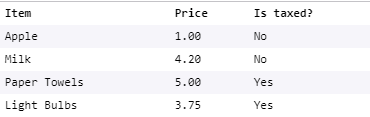

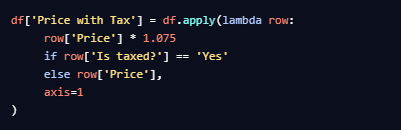

**Exercise**

On `employee_df`

If an employee worked for more than 40 hours, she needs to be paid overtime (1.5 times the normal hourly wage).

For instance, if an employee worked for 43 hours and made 10 dollars per hour, she would receive 400 dollars for the first 40 hours that she worked, and an additional 45 dollars for the 3 hours of overtime, for a total for 445 dollars.

1. Create a lambda function `total_earned` that accepts an input row with keys `hours_worked` and `hourly_wage` and uses an if statement to calculate the hourly wage.
2. Use the lambda function `total_earned` and apply to add a column `total_earned` to `df` with the total amount earned by each employee.

In [ ]:
total_earned = lambda row: row["hourly_wage"] * row["hours_worked"] if row["hours_worked"] <= 40 else row["hourly_wage"] * row["hours_worked"] * 1.5

In [ ]:
# Type your code here
employee_df["final_income"] = employee_df.apply(total_earned,axis = 1)

In [ ]:
employee_df

,id,name,hourly_wage,hours_worked,Last Name,final_income
0,10310,lauren durham,19,43,durham,1225.5
1,18656,grace sellers,17,40,sellers,680.0
2,61254,shirley rasmussen,16,30,rasmussen,480.0
3,16886,brian rojas,18,47,rojas,1269.0
4,89010,samantha mosley,11,38,mosley,418.0
5,87246,louis guzman,14,39,guzman,546.0
6,20578,denise mcclure,15,40,mcclure,600.0
7,12869,james raymond,15,32,raymond,480.0
8,53461,noah collier,18,35,collier,630.0
9,14746,donna frederick,20,41,frederick,1230.0


**Exercise**

On `PP-L2-shoefly.csv`

1. Examine the first 5 rows of the data using print and head.
2. Many of our customers want to buy vegan shoes (shoes made from materials that do not come from animals). Add a new column called `shoe_source`, which is vegan if the materials is not leather and animal otherwise.
3. Our marketing department wants to send out an email to each customer. Using the columns last_name and gender create a column called `salutation` which contains Dear Mr. *last_name* for men and Dear Ms. *last_name* for women.

In [ ]:
# Type your code here

shoefly_df = pd.read_csv("https://drive.google.com/u/1/uc?id=1TxuhuoNCG8y4nvnAPxtq7-N7NI7X4dG1&export=download")
